# Import libraries 

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('ggplot')

import nltk 

# Read Data

In [6]:
df = pd.read_csv("Reviews.csv")

# showing the 5 first review

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


1. **Id :** Un identifiant unique pour chaque enregistrement dans le jeu de données. Il sert d'index ou d'identifiant pour une critique spécifique.

2. **ProductId :** Un identifiant unique ou un code associé au produit qui fait l'objet de la critique. Chaque produit a un ProductId distinct.

3. **UserId :** L'identifiant unique de l'utilisateur qui a rédigé la critique. Il distingue les critiques de différents utilisateurs.

4. **ProfileName :** Le nom ou le nom d'utilisateur de l'utilisateur qui a rédigé la critique. Il fournit des informations sur l'identité du critique.

5. **HelpfulnessNumerator :** Le nombre d'utilisateurs ayant trouvé la critique utile. Il fait partie d'un ratio utilisé pour mesurer l'utilité d'une critique.

6. **HelpfulnessDenominator :** Le nombre total d'utilisateurs ayant voté sur l'utilité de la critique, y compris les votes utiles et non utiles.

7. **Score :** Une note numérique donnée par l'utilisateur au produit ou service faisant l'objet de la critique. Les notes sont généralement sur une échelle (par exemple, de 1 à 5).

8. **Time :** Un horodatage ou une date indiquant quand la critique a été publiée. Cela aide à comprendre l'aspect temporel des critiques.

9. **Summary :** Un résumé concis ou un titre de la critique, fournissant un bref aperçu de l'opinion ou de l'expérience de l'utilisateur.

10. **Text :** Le corps principal de la critique, où l'utilisateur fournit des commentaires détaillés, des commentaires ou des expériences liés au produit ou service.


In [9]:
df.shape

(568454, 10)

> La sortie (568454, 10) de df.shape indique un DataFrame nommé df avec 568 454 lignes et 10 colonnes. Cela représente un ensemble de données avec 568 454 points, chacun ayant 10 caractéristiques

> Maintenent On va travailler avec les 500 lignes extraites du DataFrame.

In [10]:
df = df.head(100)
print(df.shape)

(100, 10)


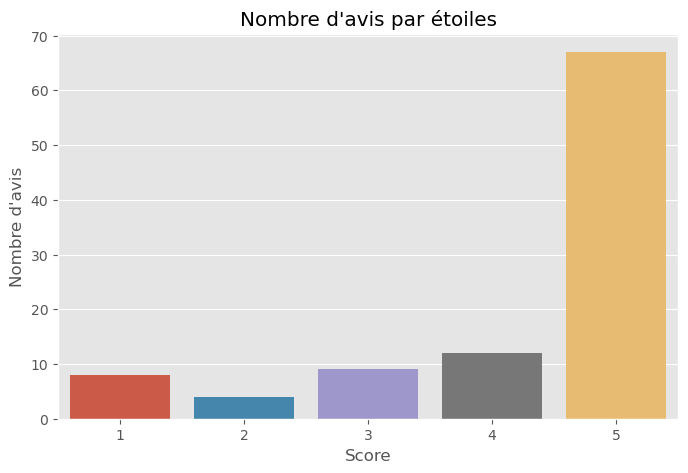

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=df)
plt.title("Nombre d'avis par étoiles")
plt.xlabel("Score")
plt.ylabel("Nombre d'avis")
plt.show()




# Data Cleaning 

### Vérifier les valeurs manquantes

In [21]:
valeurs_manquantes = df.isnull().sum()
print("Valeurs Manquantes :\n", valeurs_manquantes)

Valeurs Manquantes :
 Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


### Supprimer les doublons

In [22]:
df.drop_duplicates(inplace=True)

### Gérer les valeurs aberrantes 
** Exemple : Supprimer les lignes où 'HelpfulnessNumerator' > 'HelpfulnessDenominator'**

In [23]:
df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

### Convertir les types de données 
**Exemple : Convertir 'Time' en datetime**

In [25]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


### Nettoyage du texte (si nécessaire)
**Exemple** : Convertir le texte en minuscules

In [14]:
df['Text'] = df['Text'].str.lower()
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price. there was a wid...
